In [4]:
import numpy as np 
import pandas as pd 

from skimage import io 
from skimage.transform import resize
from skimage.color import rgb2gray

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
import os

In [5]:
x = []
y = []

path = '/train'
filepaths = [os.path.join(r,file) for r,d,f in os.walk(os.getcwd() + path) for file in f]
filepaths = [x for x in filepaths if x.endswith(".PNG")]

for filename in filepaths:
    im = io.imread(filename)
    im = np.round((resize(im, (36, 36), anti_aliasing=True, preserve_range=True))).astype(int)

    if filename.split("_")[1].split(".")[0] == '1':
         x.append(im)
         y.append(1)

    elif filename.split("_")[1].split(".")[0] == '2':
         x.append(im)
         y.append(2)

    elif filename.split("_")[1].split(".")[0] == '3':
         x.append(im)
         y.append(3)


X_train = np.array(x)
labels = np.array(y)
len(X_train)

24

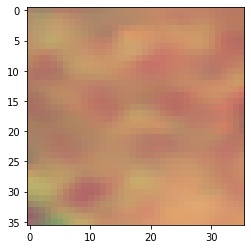

In [6]:
X_train = np.delete(X_train, 3, 3)
plt.imshow(X_train[0]) 

In [7]:
x = np.copy(X_train)
# x[0].shape

In [8]:
pixel_values = []

for i in x:
    pixel_values.append(np.float32(i)/255)

x = np.array(pixel_values)

In [9]:
np.insert(x[0].reshape(-1, 3), 3, 1, axis=1)

#x[0].reshape(-1, 3).shape

array([[0.6627451 , 0.5294118 , 0.42352942, 1.        ],
       [0.6392157 , 0.5372549 , 0.41960785, 1.        ],
       [0.6156863 , 0.53333336, 0.41568628, 1.        ],
       ...,
       [0.8509804 , 0.58431375, 0.41568628, 1.        ],
       [0.85882354, 0.5882353 , 0.41568628, 1.        ],
       [0.8627451 , 0.5921569 , 0.41568628, 1.        ]], dtype=float32)

In [10]:
data = pd.DataFrame(columns = ["r", "g", "b", "class"])

In [11]:
for i in range(len(labels)):
    data = data.append(pd.DataFrame(np.insert(x[i].reshape(-1, 3), 3, labels[i], axis=1), columns = ["r", "g", "b", "class"]))

In [12]:
data

,r,g,b,class
0,0.662745,0.529412,0.423529,1.0
1,0.639216,0.537255,0.419608,1.0
2,0.615686,0.533333,0.415686,1.0
3,0.643137,0.525490,0.415686,1.0
4,0.682353,0.509804,0.415686,1.0
...,...,...,...,...
1291,0.992157,0.992157,0.992157,3.0
1292,0.992157,0.992157,0.992157,3.0
1293,0.992157,0.992157,0.992157,3.0
1294,0.992157,0.992157,0.992157,3.0


In [13]:
data = data.reset_index()
data = data.drop(["index"], axis=1)
data

,r,g,b,class
0,0.662745,0.529412,0.423529,1.0
1,0.639216,0.537255,0.419608,1.0
2,0.615686,0.533333,0.415686,1.0
3,0.643137,0.525490,0.415686,1.0
4,0.682353,0.509804,0.415686,1.0
...,...,...,...,...
31099,0.992157,0.992157,0.992157,3.0
31100,0.992157,0.992157,0.992157,3.0
31101,0.992157,0.992157,0.992157,3.0
31102,0.992157,0.992157,0.992157,3.0


In [14]:
x = data.iloc[:, [0, 1, 2]].values.astype(np.float64)
x

array([[0.66274512, 0.52941179, 0.42352942],
       [0.63921571, 0.53725493, 0.41960785],
       [0.6156863 , 0.53333336, 0.41568628],
       ...,
       [0.99215686, 0.99215686, 0.99215686],
       [0.99215686, 0.99215686, 0.99215686],
       [0.99215686, 0.99215686, 0.99215686]])

In [15]:
y = data['class'].values
y

array([1., 1., 1., ..., 3., 3., 3.], dtype=float32)

In [16]:
lb = LabelBinarizer()
labels = data['class'].values
labels = lb.fit_transform(labels)
labels

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [17]:
from network import ShallowNeuralNetwork

In [18]:
x.shape

(31104, 3)

In [19]:
X_tr, X_te, Y_tr, Y_te = train_test_split(x, labels, test_size=0.33, shuffle=True, random_state=49)

In [20]:
X_tr 

array([[0.99215686, 0.99215686, 0.99215686],
       [0.47843137, 0.11764706, 0.34901962],
       [0.64313728, 0.56862748, 0.47843137],
       ...,
       [0.29019609, 0.        , 0.35294119],
       [1.        , 1.        , 1.        ],
       [0.72156864, 0.50588238, 0.40784314]])

In [21]:
snn = ShallowNeuralNetwork(sizes=[3, 8, 3], l_rate=0.01)
snn.train(X_tr, Y_tr, X_te, Y_te)

Epoch: 1, Time Spent: 3.37s, Accuracy: 69.86%
Epoch: 2, Time Spent: 6.58s, Accuracy: 80.94%
Epoch: 3, Time Spent: 9.85s, Accuracy: 82.45%
Epoch: 4, Time Spent: 13.03s, Accuracy: 83.68%
Epoch: 5, Time Spent: 16.09s, Accuracy: 84.50%
Epoch: 6, Time Spent: 19.44s, Accuracy: 84.84%
Epoch: 7, Time Spent: 22.86s, Accuracy: 85.58%
Epoch: 8, Time Spent: 26.32s, Accuracy: 86.34%
Epoch: 9, Time Spent: 29.92s, Accuracy: 87.00%
Epoch: 10, Time Spent: 33.77s, Accuracy: 87.61%


In [22]:
y_p = []

for i in X_te:
    k = snn.predict(i)
    y_p.append(np.argmax(k))

y_actual = []

for i in Y_te:
    y_actual.append(np.argmax(i))

In [23]:
print(classification_report(
    y_p, y_actual))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3741
           1       0.77      0.94      0.84      2808
           2       1.00      0.92      0.96      3716

    accuracy                           0.88     10265
   macro avg       0.88      0.88      0.87     10265
weighted avg       0.89      0.88      0.88     10265



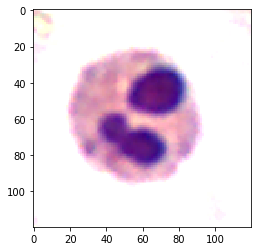

In [24]:
X_test = io.imread("dataset/Dataset 1/236.bmp")
l, w = X_test.shape[0:2]

pixel_values = []

pixel_values = np.float32(X_test)/255

X_test = np.array(pixel_values)

plt.imshow(X_test)

In [25]:
l, w

(120, 120)

In [26]:
test = pd.DataFrame(columns = ["r", "g", "b"])
test = test.append(pd.DataFrame(X_test.reshape(-1, 3), columns = ["r", "g", "b"]))
test.values

array([[1.        , 0.88235295, 0.88235295],
       [0.95686275, 0.85490197, 0.8627451 ],
       [0.972549  , 0.8745098 , 0.8509804 ],
       ...,
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ]], dtype=float32)

In [27]:
y_pred = []

for i in test.values:
    y_pred.append(snn.predict(i).argmax())

y_pred = np.array(y_pred)

In [28]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2], dtype=int64), array([ 2967,  1121, 10312], dtype=int64))

In [29]:
cluster1_mean = np.mean(test[y_pred == 0], axis=0)
cluster2_mean = np.mean(test[y_pred == 1], axis=0)
cluster3_mean = np.mean(test[y_pred == 2], axis=0)

In [30]:
y_pred.reshape(-1, 1)

array([[2],
       [2],
       [2],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [31]:
y_mean = []
for i in y_pred:
    if i == 0:
        y_mean.append(cluster1_mean)

    elif i == 1:
        y_mean.append(cluster2_mean)

    elif i == 2:
        y_mean.append(cluster3_mean)
y_mean = np.array(y_mean)

In [32]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2], dtype=int64), array([ 2967,  1121, 10312], dtype=int64))

In [33]:
y_mean.shape

(14400, 3)

In [34]:
y_mean = y_mean.reshape(l, w, 3)

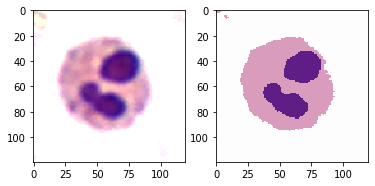

In [35]:
plt.subplot(1, 2, 1)
plt.imshow(io.imread("dataset/Dataset 1/236.bmp"))

plt.subplot(1, 2, 2)
plt.imshow(y_mean)
plt.show()

In [36]:
import pickle

In [37]:
with open('snn.pickle', 'wb') as f:
    pickle.dump(snn, f)